Experimento GA.03 - caixeiro com gasolina infinita
========================================



## Introdução



Considere um número  𝑛≥7 de coordenadas  (𝑥,𝑦) de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.



## Objetivo



Encontre o caminho de *maior* distância no problema do caixeiro viajante e mostre ele de forma gráfica.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [1]:
import random
from itertools import permutations
from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv
from funcoes import funcao_objetivo_cv
from funcoes import selecao_torneio_min as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

import matplotlib.pyplot as plt
import networkx as nx

## Códigos e discussão



Aqui nós adicionamos as variáveis necessárias para definir nosso problema

In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 6
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

As funções locais são úteis para redefinir funções que importamos sem ter que alterar o código do algoritmo genético. A escolha desse método de operação pode ajudar na organização do código e o reaproveitamento para futuros problemas.

In [3]:
# Funções locais
def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [4]:
populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = 0 # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    

Diferente do caixeito viajante original, este é um problema de maximização, portanto queremos o maior valor possível para o fitness. Para fazer essa alteração do objetivo do nosso problema, nós começamos por alterar o "melhor_fitness_ja_visto". No problema original o "melhor_fitness_ja_visto" era um _float_ infinito, assim qualquer primeiro fitness encontrado seria menor que ele, e para o problema anterior, já substituiria o valor anterior, como queremos aumentar o valor do fitness, substitui seu valor original para 0, assim, qualquer fitness será maior que o primeiro.

O segundo passo é alterar o melhor_fitness_ja_visto caso o fitness do indivíduo for ainda maior que o anterior, essa mudança foi feita no final do código do algoritmo genético, mudando o sinal de inequação dentro do if, assim eu garanto que ele pegue um valor maior e não um menor.


### Vamos testar o resultado!!

In [5]:
print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 0', 'Cidade 2'] com distância: 4.3841808941788525


Temos então um resultado probabilistico de qual é o caminho que a distância é maior, além da distância percorrida!!


### Vamos ver uma representação gráfica

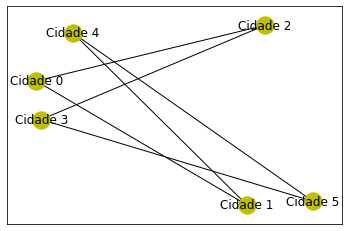

In [6]:
# Representação gráfica:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'y')

## Conclusão



Em resumo, o código implementa um algoritmo genético que usa seleção, cruzamento e mutação para encontrar uma solução aproximada para o problema do caixeiro viajante que quer percorrer o maior caminho possivel, mantendo o melhor indivíduo encontrado até o momento.

No caso do problema do caixeiro viajante de gasolina infinita, mudamos o objetivo do problema para maximização e ajustamos o código do algoritmo genético para garantir que o melhor fitness encontrado seja sempre o maior. Com essas mudanças, obtivemos um resultado probabilístico do caminho que percorre a maior distância, além de saber a distância total percorrida. Essas mudanças foram fundamentais para resolver o problema proposto e obter um resultado satisfatório.
Por último, podemos ver como seria o caminho percorrido pelo caixeiro.

## Playground

